In [1]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


<font size="5">HOURS-KATEGORIEN-STARS</font>

In [1]:
import psycopg2
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from statistics import mean 


In [18]:
ls_head = 20  # Überschrift
ls_axis = 18  # x/y-Beschriftung
ls_font = 16  # Schrif (zB .text)
ls_label = 16  # Werte x/y-Achse
ls_legend = 16  # Schriftgröße der Legende
figsize = (21, 7)
alphalegend = 0.9
s_dpi = 300

# Übergabe in ein Dict und anschließend aktualisieren der Parameter
rc = {'figure.figsize': figsize,
      'legend.framealpha': alphalegend,
      'axes.labelsize': ls_axis, 'font.size': ls_font, 'legend.fontsize': ls_legend,
      'axes.titlesize': ls_head, 'xtick.labelsize': ls_label, 'ytick.labelsize': ls_label,
      'grid.color': 'k', 'grid.linestyle': '--',
      "savefig.dpi": s_dpi, "savefig.format": 'svg'}
plt.rcParams.update(**rc)

In [3]:

host = "141.100.70.97"
user = "sync3"
dbname = "sync3"
password = "sync3"

connector = psycopg2.connect(host=host,user=user,dbname=dbname,password=password)

SQL_hours   = """ SELECT stars, h.open, h.close, h.dow, cats.cat
                  FROM hours h
                  INNER JOIN business b
                    ON h.bid = b.bid
                  INNER JOIN category cat
                    ON b.bid = cat.bid
                  INNER JOIN categories cats
                    ON cat.cid = cats.cid
               """
#Nur Montag
#Nur Restaurant
#AND cats.cat in ('Restaurants')
#WHERE h.dow = 0


In [4]:
df_h = pd.read_sql_query(SQL_hours, connector)

In [5]:
# Clean DF
df_h = df_h.loc[:,~df_h.columns.duplicated()]
print(f"ANZAHL FEHLENDER WERTE IN df_h:\t {str(df_h.isnull().sum().sum())}")
df_h = df_h.dropna().reset_index(drop=True)


ANZAHL FEHLENDER WERTE IN df_h:	 0


In [6]:
print(f"DATAFRAME df_h:\n {str(df_h)}")

DATAFRAME df_h:
          stars      open     close  dow                   cat
0          2.5  18:00:00  22:00:00    4  Arts & Entertainment
1          2.5  18:00:00  22:00:00    4          Local Flavor
2          2.5  18:00:00  22:00:00    4             Festivals
3          2.5  18:00:00  22:00:00    5  Arts & Entertainment
4          2.5  18:00:00  22:00:00    5          Local Flavor
...        ...       ...       ...  ...                   ...
4642657    2.0  10:00:00  22:00:00    4            Sandwiches
4642658    2.0  10:00:00  22:00:00    5           Restaurants
4642659    2.0  10:00:00  22:00:00    5            Sandwiches
4642660    2.0  10:00:00  22:00:00    6           Restaurants
4642661    2.0  10:00:00  22:00:00    6            Sandwiches

[4642662 rows x 5 columns]


In [7]:
df_h.dtypes

stars    float64
open      object
close     object
dow        int64
cat       object
dtype: object

In [8]:
#DEFINE SUBGROUP
dow = 0
cat = 'Restaurants'
df_hours = df_h[(df_h.dow == dow ) & (df_h.cat == cat )]


In [9]:
df_hours

,stars,open,close,dow,cat
39,4.0,11:00:00,22:00:00,0,Restaurants
53,3.5,11:00:00,00:00:00,0,Restaurants
265,3.5,17:00:00,22:00:00,0,Restaurants
358,3.0,11:30:00,02:00:00,0,Restaurants
603,3.5,00:00:00,00:00:00,0,Restaurants
...,...,...,...,...,...
4642237,4.5,10:30:00,20:30:00,0,Restaurants
4642550,4.5,08:00:00,14:30:00,0,Restaurants
4642595,2.5,10:45:00,23:00:00,0,Restaurants
4642616,4.0,17:00:00,23:00:00,0,Restaurants


In [10]:


df_hours['open_str'] = df_hours['open'].astype(str)
df_hours['close_str'] = df_hours['close'].astype(str)


df_hours['close_str'] = np.where(df_hours['open']> df_hours['close'] , '2021-01-02 '+df_hours['close_str'] , '2021-01-01 '+df_hours['close_str'])
a = '2021-01-01 '
df_hours['open_str'] = a + df_hours['open_str'] 


df_hours['open_stp'] = df_hours['open_str'].apply(lambda x:  pd.Timestamp(x))
df_hours['close_stp'] = df_hours['close_str'].apply(lambda x:  pd.Timestamp(x))
df_hours['diff'] = df_hours['close_stp'] - df_hours['open_stp']
df_hours['open_len'] = df_hours['diff'].apply(lambda x:(x.total_seconds())//3600)




<ipython-input-10-044ea6a4ec99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hours['open_str'] = df_hours['open'].astype(str)
<ipython-input-10-044ea6a4ec99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hours['close_str'] = df_hours['close'].astype(str)
<ipython-input-10-044ea6a4ec99>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [11]:
df_hours

,stars,open,close,dow,cat,open_str,close_str,open_stp,close_stp,diff,open_len
39,4.0,11:00:00,22:00:00,0,Restaurants,2021-01-01 11:00:00,2021-01-01 22:00:00,2021-01-01 11:00:00,2021-01-01 22:00:00,0 days 11:00:00,11.0
53,3.5,11:00:00,00:00:00,0,Restaurants,2021-01-01 11:00:00,2021-01-02 00:00:00,2021-01-01 11:00:00,2021-01-02 00:00:00,0 days 13:00:00,13.0
265,3.5,17:00:00,22:00:00,0,Restaurants,2021-01-01 17:00:00,2021-01-01 22:00:00,2021-01-01 17:00:00,2021-01-01 22:00:00,0 days 05:00:00,5.0
358,3.0,11:30:00,02:00:00,0,Restaurants,2021-01-01 11:30:00,2021-01-02 02:00:00,2021-01-01 11:30:00,2021-01-02 02:00:00,0 days 14:30:00,14.0
603,3.5,00:00:00,00:00:00,0,Restaurants,2021-01-01 00:00:00,2021-01-01 00:00:00,2021-01-01 00:00:00,2021-01-01 00:00:00,0 days 00:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4642237,4.5,10:30:00,20:30:00,0,Restaurants,2021-01-01 10:30:00,2021-01-01 20:30:00,2021-01-01 10:30:00,2021-01-01 20:30:00,0 days 10:00:00,10.0
4642550,4.5,08:00:00,14:30:00,0,Restaurants,2021-01-01 08:00:00,2021-01-01 14:30:00,2021-01-01 08:00:00,2021-01-01 14:30:00,0 days 06:30:00,6.0
4642595,2.5,10:45:00,23:00:00,0,Restaurants,2021-01-01 10:45:00,2021-01-01 23:00:00,2021-01-01 10:45:00,2021-01-01 23:00:00,0 days 12:15:00,12.0
4642616,4.0,17:00:00,23:00:00,0,Restaurants,2021-01-01 17:00:00,2021-01-01 23:00:00,2021-01-01 17:00:00,2021-01-01 23:00:00,0 days 06:00:00,6.0


In [14]:
open_len_avgstars = df_hours.groupby('open_len')['stars'].mean().reset_index(name='avgstars')
open_len_avgstars

,open_len,avgstars
0,0.0,3.548586
1,1.0,3.391304
2,2.0,3.719697
3,3.0,3.819820
4,4.0,3.744324
5,5.0,3.722039
6,6.0,3.757459
7,7.0,3.771947
8,8.0,3.787068
9,9.0,3.729175


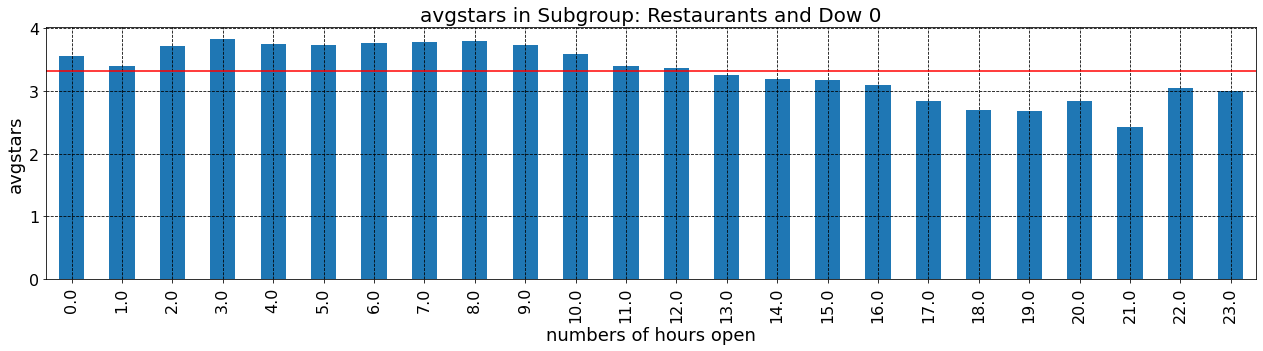

In [22]:

index = open_len_avgstars['open_len'].tolist()
y = open_len_avgstars['avgstars'].tolist()
s = pd.Series(y, index=index)

s.plot(kind="bar", rot=90)
plt.axhline(y=mean(open_len_avgstars['avgstars']), xmin=0, xmax=1,color='red')
plt.xlabel("numbers of hours open")
plt.ylabel("avgstars")
plt.title(f"avgstars in Subgroup: {str(cat)} and Dow {str(dow)}")
plt.subplots_adjust(left=0.15, bottom=0.50, right=0.95, top=1,wspace=0.0, hspace=0.0)
plt.grid()
plt.savefig('picture_präsi/avgstars-open_len.svg',dpi=1200, bbox_inches='tight')
plt.show()

#durchschnittsbewertung nach open_len 
# nach cluster nach wochentag variable


    open_len  freq
0        0.0  7780
1        1.0    23
2        2.0    66
3        3.0   222
4        4.0   925
5        5.0  1520
6        6.0  1039
7        7.0  1048
8        8.0  1794
9        9.0  2653
10      10.0  6403
11      11.0  7739
12      12.0  4462
13      13.0  2813
14      14.0  2119
15      15.0  2231
16      16.0  1104
17      17.0   724
18      18.0   597
19      19.0   308
20      20.0   134
21      21.0    48
22      22.0    22
23      23.0    57


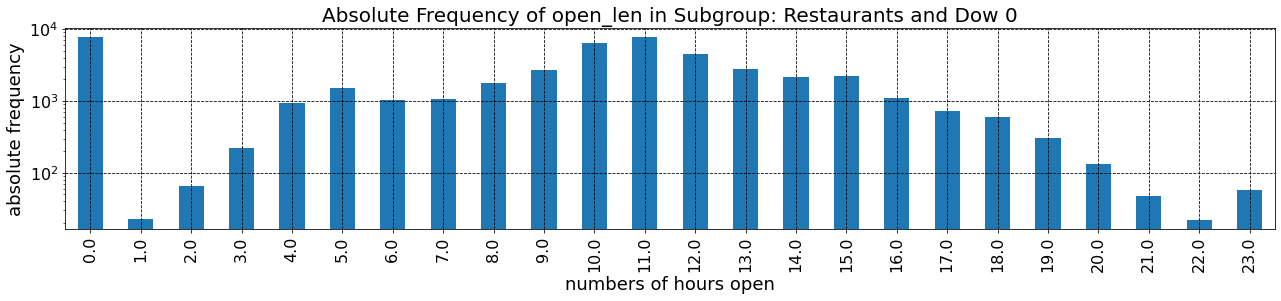

In [23]:
print(df_hours.groupby('open_len').size().reset_index(name='freq'))


df_hours.groupby('open_len').size().sort_index().plot(kind='bar')
plt.xlabel("numbers of hours open")
plt.ylabel("absolute frequency")
plt.title(f"Absolute Frequency of open_len in Subgroup: {str(cat)} and Dow {str(dow)}")

plt.subplots_adjust(left=0.15, bottom=0.50, right=0.95, top=0.9,wspace=0.0, hspace=0.0)
plt.grid()
plt.yscale("log")
plt.savefig('picture_präsi/absfreq-open_len.svg',dpi=1200, bbox_inches='tight')
plt.show()



In [15]:
#DEFINE SUBGROUP
dow =  0
cat = 'Food'
df_hours = df_h[(df_h.dow == dow ) & (df_h.cat == cat )]


df_hours['open_str'] = df_hours['open'].astype(str)
df_hours['close_str'] = df_hours['close'].astype(str)


df_hours['close_str'] = np.where(df_hours['open']> df_hours['close'] , '2021-01-02 '+df_hours['close_str'] , '2021-01-01 '+df_hours['close_str'])
a = '2021-01-01 '
df_hours['open_str'] = a + df_hours['open_str'] 


df_hours['open_stp'] = df_hours['open_str'].apply(lambda x:  pd.Timestamp(x))
df_hours['close_stp'] = df_hours['close_str'].apply(lambda x:  pd.Timestamp(x))
df_hours['diff'] = df_hours['close_stp'] - df_hours['open_stp']
df_hours['open_len'] = df_hours['diff'].apply(lambda x:(x.total_seconds())//3600)



open_len_avgstars = df_hours.groupby('open_len')['avg'].mean().reset_index(name='avgstars')



<ipython-input-15-e9a8e093049c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hours['open_str'] = df_hours['open'].astype(str)
<ipython-input-15-e9a8e093049c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hours['close_str'] = df_hours['close'].astype(str)
<ipython-input-15-e9a8e093049c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

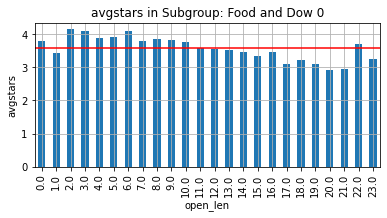

In [16]:
index = open_len_avgstars['open_len'].tolist()
y = open_len_avgstars['avgstars'].tolist()
s = pd.Series(y, index=index)

s.plot(kind="bar", rot=90)
plt.axhline(y=mean(open_len_avgstars['avgstars']), xmin=0, xmax=1,color='red')
plt.xlabel("open_len")
plt.ylabel("avgstars")
plt.title(f"avgstars in Subgroup: {str(cat)} and Dow {str(dow)}")
plt.subplots_adjust(left=0.15, bottom=0.50, right=0.95, top=1,wspace=0.0, hspace=0.0)
plt.grid()
plt.show()

    open_len  freq
0        0.0    24
1        1.0     8
2        2.0    13
3        3.0    26
4        4.0    35
5        5.0    38
6        6.0    49
7        7.0    48
8        8.0    54
9        9.0    53
10      10.0    44
11      11.0    49
12      12.0    44
13      13.0    35
14      14.0    40
15      15.0    36
16      16.0    30
17      17.0    31
18      18.0    26
19      19.0    20
20      20.0    16
21      21.0    13
22      22.0     9
23      23.0    12


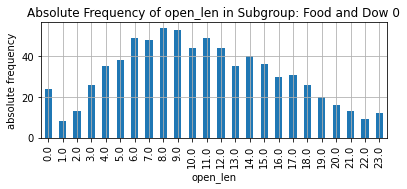

In [17]:
print(df_hours.groupby('open_len').size().reset_index(name='freq'))


df_hours.groupby('open_len').size().sort_index().plot(kind='bar')
plt.xlabel("open_len")
plt.ylabel("absolute frequency")
plt.title(f"Absolute Frequency of open_len in Subgroup: {str(cat)} and Dow {str(dow)}")

plt.subplots_adjust(left=0.15, bottom=0.50, right=0.95, top=0.9,wspace=0.0, hspace=0.0)
plt.grid()
plt.show()


In [18]:
#DEFINE SUBGROUP
dow =  0
cat = 'Nightlife'
df_hours = df_h[(df_h.dow == dow ) & (df_h.cat == cat )]


df_hours['open_str'] = df_hours['open'].astype(str)
df_hours['close_str'] = df_hours['close'].astype(str)


df_hours['close_str'] = np.where(df_hours['open']> df_hours['close'] , '2021-01-02 '+df_hours['close_str'] , '2021-01-01 '+df_hours['close_str'])
a = '2021-01-01 '
df_hours['open_str'] = a + df_hours['open_str'] 


df_hours['open_stp'] = df_hours['open_str'].apply(lambda x:  pd.Timestamp(x))
df_hours['close_stp'] = df_hours['close_str'].apply(lambda x:  pd.Timestamp(x))
df_hours['diff'] = df_hours['close_stp'] - df_hours['open_stp']
df_hours['open_len'] = df_hours['diff'].apply(lambda x:(x.total_seconds())//3600)



open_len_avgstars = df_hours.groupby('open_len')['avg'].mean().reset_index(name='avgstars')


<ipython-input-18-414e3ab4867b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hours['open_str'] = df_hours['open'].astype(str)
<ipython-input-18-414e3ab4867b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hours['close_str'] = df_hours['close'].astype(str)
<ipython-input-18-414e3ab4867b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

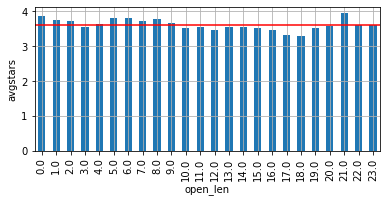

In [19]:
index = open_len_avgstars['open_len'].tolist()
y = open_len_avgstars['avgstars'].tolist()
s = pd.Series(y, index=index)

s.plot(kind="bar", rot=90)
plt.axhline(y=mean(open_len_avgstars['avgstars']), xmin=0, xmax=1,color='red')
plt.xlabel("open_len")
plt.ylabel("avgstars")

plt.subplots_adjust(left=0.15, bottom=0.50, right=0.95, top=1,wspace=0.0, hspace=0.0)
plt.grid()
plt.show()

    open_len  freq
0        0.0    14
1        1.0    20
2        2.0    18
3        3.0    19
4        4.0    23
5        5.0    36
6        6.0    31
7        7.0    34
8        8.0    37
9        9.0    39
10      10.0    35
11      11.0    32
12      12.0    38
13      13.0    30
14      14.0    27
15      15.0    34
16      16.0    26
17      17.0    19
18      18.0    19
19      19.0    14
20      20.0    12
21      21.0     8
22      22.0     5
23      23.0     5


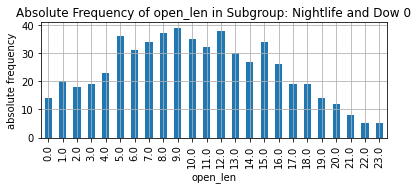

In [20]:
print(df_hours.groupby('open_len').size().reset_index(name='freq'))


df_hours.groupby('open_len').size().sort_index().plot(kind='bar')
plt.xlabel("open_len")
plt.ylabel("absolute frequency")
plt.title(f"Absolute Frequency of open_len in Subgroup: {str(cat)} and Dow {str(dow)}")

plt.subplots_adjust(left=0.15, bottom=0.50, right=0.95, top=0.9,wspace=0.0, hspace=0.0)
plt.grid()
plt.show()


In [21]:
#interaktiv wie sieht es aus wenn cat eingeschränkt wird, oder oder.... 
# wie sieht es je nach Cluster aus?
#in bestimmten cluster ist eine länge der Öffnungszeit anders beliebt?

<font size="5">ATTRIBUTE-KATEGORIEN-STARS</font>

In [22]:
host = "141.100.70.97"
user = "sync3"
dbname = "sync3"
password = "sync3"

connector = psycopg2.connect(host=host,user=user,dbname=dbname,password=password)
SQL_attribute = """ SELECT a.attr, a.bid, cats.cat, b.stars
                    FROM attribute a
                    INNER JOIN business b
                        ON a.bid = b.bid
                    INNER JOIN category cat
                        ON b.bid = cat.bid
                    INNER JOIN categories cats
                        ON cat.cid = cats.cid
                        
                """
#AND cats.cat in ('Restaurants','Nightlife','Food')

In [23]:
df_attr = pd.read_sql_query(SQL_attribute, connector)

In [24]:
print(f"DATAFRAME df_attribute:\n {str(df_attr)}")

DATAFRAME df_attribute:
                             attr                     bid  \
0                BusinessParking  Oo3X0pVhRe93-eky6MvM4w   
1                 OutdoorSeating  Oo3X0pVhRe93-eky6MvM4w   
2       RestaurantsGoodForGroups  Oo3X0pVhRe93-eky6MvM4w   
3                BusinessParking  Oo3X0pVhRe93-eky6MvM4w   
4                 OutdoorSeating  Oo3X0pVhRe93-eky6MvM4w   
...                          ...                     ...   
980539  RestaurantsGoodForGroups  VE8BouWadOixfUIljcdSZg   
980540  RestaurantsGoodForGroups  VE8BouWadOixfUIljcdSZg   
980541           BusinessParking  0UH2Swv5cV1xmyE8E8A2Kg   
980542           BusinessParking  0UH2Swv5cV1xmyE8E8A2Kg   
980543           BusinessParking  0UH2Swv5cV1xmyE8E8A2Kg   

                           cat  stars  
0                         Bars    3.5  
1                         Bars    3.5  
2                         Bars    3.5  
3       American (Traditional)    3.5  
4       American (Traditional)    3.5  
...           

In [25]:
df_attr = df_attr.loc[:,~df_attr.columns.duplicated()]
print(f"ANZAHL FEHLENDER WERTE IN df_attr:\t {str(df_attr.isnull().sum().sum())}")
df_attr = df_attr.dropna().reset_index(drop=True)

ANZAHL FEHLENDER WERTE IN df_attr:	 0


In [26]:
print(f"STATISTISCHE ZUSAMMENFASSUNG IN df_attr:\n {str(df_attr.describe())}")

STATISTISCHE ZUSAMMENFASSUNG IN df_attr:
                stars
count  980544.000000
mean        3.621853
std         0.747548
min         1.000000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000


In [27]:
#DEFINE SUBGROUP

cat = 'Restaurants'
df_attribute = df_attr[df_attr.cat == cat ]


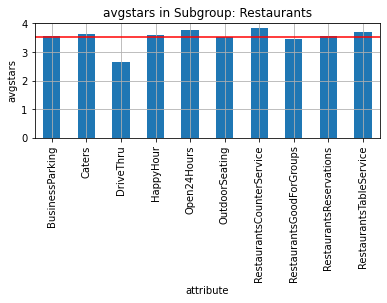

In [28]:
avgstars = df_attribute.groupby('attr').mean().reset_index()["stars"].tolist()
index = df_attribute.groupby('attr').mean().reset_index()["attr"].tolist()
s = pd.Series(avgstars, index=index)

s.plot(kind="bar", rot=90)

plt.axhline(y=mean(avgstars), xmin=0, xmax=1,color='red')
plt.xlabel("attribute")
plt.ylabel("avgstars")
plt.title(f"avgstars in Subgroup: {str(cat)}")
plt.subplots_adjust(left=0.15, bottom=0.50, right=0.95, top=0.9,wspace=0.0, hspace=0.0)
plt.grid()


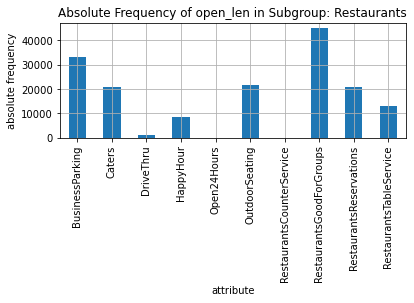

In [29]:
df_attribute['attr'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("attribute")
plt.ylabel("absolute frequency")
plt.title(f"Absolute Frequency of open_len in Subgroup: {str(cat)}")
plt.subplots_adjust(left=0.15, bottom=0.50, right=0.95, top=0.9,wspace=0.0, hspace=0.0)
plt.grid()
plt.show()

<font size='5'>ANZAHL ATTRIBUTE - AVGSTARS</font>

In [30]:
#DEFINE SUBGROUP
cat = 'Restaurants'
df_attribute = df_attr[df_attr.cat == cat ]
df_nr_attr = df_attribute.groupby('bid')['stars'].value_counts().reset_index(name='nr_attr')



In [31]:
df_nr_attr

,bid,stars,nr_attr
0,--1UhMGODdWsrMastO9DZw,4.0,2
1,--6MefnULPED_I942VcFNA,3.0,5
2,--9e1ONYQuAa-CB_Rrw7Tw,4.0,3
3,--DaPTJW3-tB1vP-PfdTEg,4.0,3
4,--FBCX-N37CMYDfs790Bnw,4.0,4
...,...,...,...
54576,zzsOLFhgUw8gnjLTVVItFA,4.5,2
54577,zzvlwkcNR1CCqOPXwuvz2A,3.5,4
54578,zzwhN7x37nyjP0ZM8oiHmw,4.0,5
54579,zzwicjPC9g246MK2M1ZFBA,3.0,2


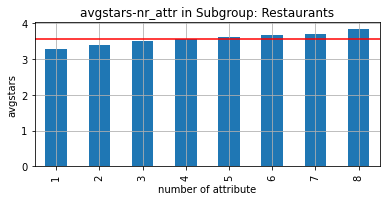

In [32]:
avgstars = df_nr_attr.groupby('nr_attr').mean().reset_index()["stars"].tolist()
index = df_nr_attr.groupby('nr_attr').mean().reset_index()['nr_attr'].tolist()
s = pd.Series(avgstars, index=index)

s.plot(kind="bar", rot=90)
plt.axhline(y=mean(avgstars), xmin=0, xmax=1,color='red')
plt.xlabel("number of attribute")
plt.ylabel("avgstars")
plt.title(f"avgstars-nr_attr in Subgroup: {str(cat)}")
plt.subplots_adjust(left=0.15, bottom=0.50, right=0.95, top=1,wspace=0.0, hspace=0.0)
plt.grid()
plt.savefig('avgstars-nr_attr.png', dpi=1200,bbox_inches='tight')
plt.show()


#wie erwartet, je mehr attribute/services ein Restaurant anzubieten hat, 

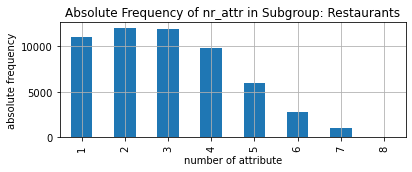

In [33]:
df_nr_attr['nr_attr'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("number of attribute")
plt.ylabel("absolute frequency")
plt.title(f"Absolute Frequency of nr_attr in Subgroup: {str(cat)}")
plt.subplots_adjust(left=0.15, bottom=0.50, right=0.95, top=0.9,wspace=0.0, hspace=0.0)
plt.grid()
plt.savefig('absfreq-nr_attr.png', dpi=1200, bbox_inches='tight')
plt.show()


In [34]:
#DEFINE SUBGROUP
cat = 'Nightlife'
df_attribute = df_attr[df_attr.cat == cat ]
df_nr_attr = df_attribute.groupby('bid')['stars'].value_counts().reset_index(name='nr_attr')

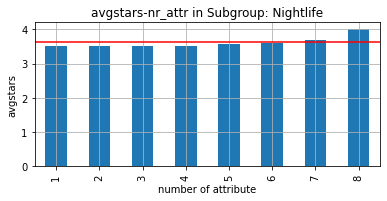

In [35]:
avgstars = df_nr_attr.groupby('nr_attr').mean().reset_index()["stars"].tolist()
index = df_nr_attr.groupby('nr_attr').mean().reset_index()['nr_attr'].tolist()
s = pd.Series(avgstars, index=index)

s.plot(kind="bar", rot=90)
plt.axhline(y=mean(avgstars), xmin=0, xmax=1,color='red')
plt.xlabel("number of attribute")
plt.ylabel("avgstars")
plt.title("Average Star in each Attribute")
plt.title(f"avgstars-nr_attr in Subgroup: {str(cat)}")
plt.subplots_adjust(left=0.15, bottom=0.50, right=0.95, top=1,wspace=0.0, hspace=0.0)
plt.grid()
plt.show()

# in Nightlife hat die Anzahl der Attribute/services 
# nicht wirklich einen Einfluss auf die Bewertung
# 1-7 attr. haben ähnliche Bewertungen
# 8 hat im Vergleich zu anderen deutlich hohe Bewertung

# anders als in der Kategory Restaurants ist in Nightlife die Bewertung unabhängig 
#von den Anzahl der Attributen
#Vgl untere Häufigkeitstabelle, nur 1-7 sind vetrauenswürdig, 8 ist ne Ausnahme




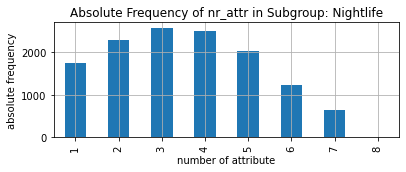

In [36]:
df_nr_attr['nr_attr'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("number of attribute")
plt.ylabel("absolute frequency")
plt.title(f"Absolute Frequency of nr_attr in Subgroup: {str(cat)}")
plt.subplots_adjust(left=0.15, bottom=0.50, right=0.95, top=0.9,wspace=0.0, hspace=0.0)
plt.grid()
plt.show()

In [37]:
#DEFINE SUBGROUP
cat = 'Food'
df_attribute = df_attr[df_attr.cat == cat ]
df_nr_attr = df_attribute.groupby('bid')['stars'].value_counts().reset_index(name='nr_attr')

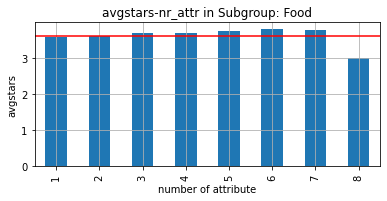

In [38]:
avgstars = df_nr_attr.groupby('nr_attr').mean().reset_index()["stars"].tolist()
index = df_nr_attr.groupby('nr_attr').mean().reset_index()['nr_attr'].tolist()
s = pd.Series(avgstars, index=index)

s.plot(kind="bar", rot=90)
plt.axhline(y=mean(avgstars), xmin=0, xmax=1,color='red')
plt.xlabel("number of attribute")
plt.ylabel("avgstars")
plt.title("Average Star in each Attribute")
plt.title(f"avgstars-nr_attr in Subgroup: {str(cat)}")
plt.subplots_adjust(left=0.15, bottom=0.50, right=0.95, top=1,wspace=0.0, hspace=0.0)
plt.grid()
plt.show()


#Auch hier ist eine minimale steigung der bewertung von 1-7
#mit steigung der Anzahl der Attr festzustellen
#jedoch ist die häugifkeit auch nur von 1-5 Vertrauenswürdig

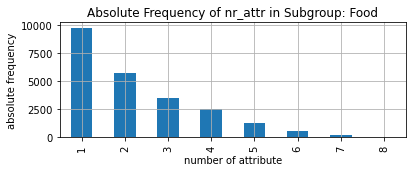

In [39]:
df_nr_attr['nr_attr'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("number of attribute")
plt.ylabel("absolute frequency")
plt.title(f"Absolute Frequency of nr_attr in Subgroup: {str(cat)}")
plt.subplots_adjust(left=0.15, bottom=0.50, right=0.95, top=0.9,wspace=0.0, hspace=0.0)
plt.grid()
plt.show()

In [40]:
# insgesamt ist für food und restaurants einen leichten Zusammenhang zwischen Steigung der 
# Anzahl der Attribute mit steigung der Bewertung festzustellen. 
# Für NIghtlife sind die Anzahl der attribute und Bewertung unabhängig.


<font size ='5'>KATEGORIEN-CLUSTER-STARS-MARKTUNTERSUCHUNG</font>

In [41]:
host = "141.100.70.97"
user = "sync3"
dbname = "sync3"
password = "sync3"

connector = psycopg2.connect(host=host,user=user,dbname=dbname,password=password)
SQL_categories = """ SELECT cats.cat, b.stars, b.clusterid
                    FROM categories cats
                    INNER JOIN category cat
                        ON cats.cid = cat.cid
                    INNER JOIN business b
                        ON b.bid = cat.bid
                """

In [42]:
df_categories = pd.read_sql_query(SQL_categories, connector)

In [43]:
df_categories

,cat,stars,clusterid
0,Bars,3.5,9
1,American (Traditional),3.5,9
2,Nightlife,3.5,9
3,Restaurants,3.5,9
4,Party & Event Planning,2.0,8
...,...,...,...
872695,Auto Parts & Supplies,4.0,3
872696,Auto Repair,4.0,3
872697,Shopping,2.5,1
872698,Cosmetics & Beauty Supply,2.5,1


In [44]:

#regex in pandas


df_categories['subgroup'] = np.where(df_categories['cat'].str.match('Shopping'), 'Shopping', 'others')
df_categories['subgroup'].mask(df_categories['cat'].str.match(r'.*Beauty.*',case=False)|df_categories['cat'].str.match(r'.*Spa.*',case=False)|
                               df_categories['cat'].str.match(r'.*Nail.*',case=False)|df_categories['cat'].str.match(r'.*Make-Up.*',case=False)
                               |df_categories['cat'].str.match(r'.*Makeup.*',case=False)|df_categories['cat'].str.match(r'.*Make Up.*',case=False)
                               |df_categories['cat'].str.match(r'.*Cosmetic.*',case=False), 'Beauty', inplace=True)
df_categories['subgroup'].mask(df_categories['cat'].str.match(r'.*Restaurant.*',case=False)|df_categories['cat'].str.match(r'.*Food.*',case=False),
                               'Food', inplace=True)
df_categories['subgroup'].mask(df_categories['cat'].str.match(r'.*Nightlife.*',case=False)|df_categories['cat'].str.match(r'.*Club.*',case=False),
                               'Nightlife', inplace=True)
df_categories['subgroup'].mask(df_categories['cat'].str.match(r'.*Auto.*',case=False)|df_categories['cat'].str.match(r'.*Car.*',case=False),
                               'Car', inplace=True)
df_categories['subgroup'].mask(df_categories['cat'].str.match(r'.*Fitness.*',case=False)|df_categories['cat'].str.match(r'.*Sport.*',case=False)
                               |df_categories['cat'].str.match(r'.*Yoga.*'), 'Sport', inplace=True)
df_categories['subgroup'].mask(df_categories['cat'].str.match(r'.*Pharmacy.*',case=False)|df_categories['cat'].str.match(r'.*Drug.*',case=False)
                               |df_categories['cat'].str.match(r'.*Chemist.*',case=False)|df_categories['cat'].str.match(r'.*Hospital.*',case=False)
                               |df_categories['cat'].str.match(r'.*Clinic.*',case=False)|df_categories['cat'].str.match(r'.*Infirmary.*',case=False)
                               |df_categories['cat'].str.match(r'.*Dentis.*',case=False)
                               , 'Health Care', inplace=True)




In [45]:
df_categories

,cat,stars,clusterid,subgroup
0,Bars,3.5,9,others
1,American (Traditional),3.5,9,others
2,Nightlife,3.5,9,Nightlife
3,Restaurants,3.5,9,Food
4,Party & Event Planning,2.0,8,others
...,...,...,...,...
872695,Auto Parts & Supplies,4.0,3,Car
872696,Auto Repair,4.0,3,Car
872697,Shopping,2.5,1,Shopping
872698,Cosmetics & Beauty Supply,2.5,1,Beauty


In [46]:
#DEFINE SUBGROUP
sub = 2 #Food
liste = []
liste1 = []

for i in range(1,11):
    clusterid = i
    df_cats_cluster = df_categories[df_categories.clusterid == clusterid]
    df_cats_cluster_gr = df_cats_cluster.groupby('subgroup').size().reset_index(name='freq')
    df_cats_cluster_gr['rel_freq'] = df_cats_cluster_gr['freq']/sum(df_cats_cluster_gr['freq'])
    print(f'SubCategories in Cluster {str(i)}')
    print(df_cats_cluster_gr)
    liste.append(df_cats_cluster_gr.at[sub,'rel_freq'])
    liste1.append(i)
    print('-------------------------------------')

SubCategories in Cluster 1
      subgroup    freq  rel_freq
0       Beauty   11728  0.044768
1          Car   15380  0.058708
2         Food   23657  0.090303
3  Health Care    5346  0.020407
4    Nightlife    2988  0.011406
5     Shopping   10654  0.040668
6        Sport    4602  0.017567
7       others  187619  0.716174
-------------------------------------
SubCategories in Cluster 2
      subgroup   freq  rel_freq
0       Beauty   2848  0.041029
1          Car   3561  0.051300
2         Food  10967  0.157992
3  Health Care   1031  0.014853
4    Nightlife   1639  0.023612
5     Shopping   2759  0.039746
6        Sport   1192  0.017172
7       others  45418  0.654297
-------------------------------------
SubCategories in Cluster 3
      subgroup   freq  rel_freq
0       Beauty   1673  0.048563
1          Car   1693  0.049144
2         Food   6033  0.175123
3  Health Care    408  0.011843
4    Nightlife    784  0.022758
5     Shopping   1715  0.049782
6        Sport    629  0.018258
7 

In [47]:
print(len(liste))
print(liste)
print(len(liste1))
print(liste1)

10
[0.09030285448174247, 0.15799178851833176, 0.1751233671988389, 0.26186300804621415, 0.1341433778857837, 0.09867999335248451, 0.1387589013224822, 0.20862973596006165, 0.1520270935475614, 0.1464975431379271]
10
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


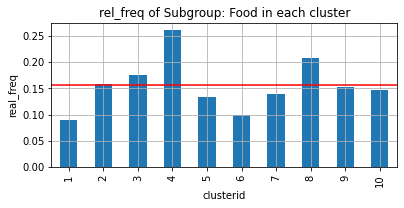

In [48]:
avgstars = liste
index = liste1
s = pd.Series(avgstars, index=index)

s.plot(kind="bar", rot=90)
plt.axhline(y=mean(avgstars), xmin=0, xmax=1,color='red')
plt.xlabel("clusterid")
plt.ylabel("real_freq")
plt.title(f"rel_freq of Subgroup: {str(cat)} in each cluster")
plt.subplots_adjust(left=0.15, bottom=0.50, right=0.95, top=1,wspace=0.0, hspace=0.0)
plt.grid()
plt.show()
